In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Importing the Keras libraries and packages
from keras.models import Sequential, load_model
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [56]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)



training_set = train_datagen.flow_from_directory('data/training',
                                                 target_size = (32, 32),
                                                 batch_size = 8,
                                                 class_mode = 'binary')

#using same sets because not enough pictures in total...
test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (32, 32),
                                            batch_size = 8,
                                            class_mode = 'binary')

Found 54 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


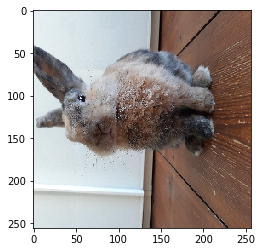

In [57]:
test_image = image.load_img('random.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
plt.imshow(test_image/255.)

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

model.add(Conv2D(30, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
#model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
model.add(Dense(4, activation = 'softmax'))
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 30)        840       
_________________________________________________________________
flatten_5 (Flatten)          (None, 27000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                270010    
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 44        
Total params: 270,894
Trainable params: 270,894
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(training_set,
                         steps_per_epoch = 50,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 50)

Epoch 1/25
50/50 [==============================] - 182s 4s/step - loss: 1.2051 - acc: 0.5541 - val_loss: 1.1593 - val_acc: 0.5518
Epoch 2/25
49/50 [============================>.] - ETA: 1s - loss: 1.1407 - acc: 0.5536

In [ ]:
model.save('trixie2.h5')

In [47]:
model = load_model('trixie2.h5')

ValueError: Error when checking input: expected conv2d_4_input to have shape (32, 32, 3) but got array with shape (128, 128, 3)

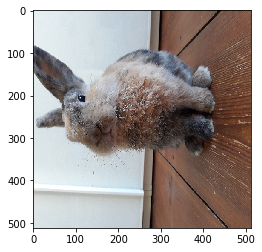

In [55]:
from keras.preprocessing import image

def predict_hasi_name(path):
    test_image = image.load_img(path, target_size = (128,128))
    test_image = image.img_to_array(test_image)
    
    plot_image = image.load_img(path, target_size = (512,512))
    plot_image = image.img_to_array(plot_image)
    plt.imshow(plot_image/255.)
    
    test_image = np.expand_dims(test_image, axis = 0)
    pred =model.predict(test_image)
    classes = training_set.class_indices

    name = 'no name found'
    print(pred)
    for key,value in classes.items():

        if pred[0][value] >= 0.5:
            name = key

        else: 
            continue
    print('found hasi: ' + str(name))
    
    return

predict_hasi_name('random.jpg')
predict_hasi_name('random2.jpg')